In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import sys
import os
from tqdm import tqdm
from fairness_helper import get_auc_data, draw_fairness_ratio, generate_evals, generate_groups_result

import warnings
warnings.filterwarnings('ignore')

In [2]:
test_label_df = pd.read_csv('COVID_diagnosis_label.csv')

test_label_df['group'] = 'old'
test_label_df.loc[test_label_df['AGE'] < 65, 'group'] = 'young'

young_df = test_label_df[test_label_df['AGE'] < 65]
senior_df = test_label_df[test_label_df['AGE'] >= 65]

In [3]:
from sklearn.metrics import average_precision_score, precision_recall_curve, auc, roc_curve, confusion_matrix

fpr, tpr, roc_auc, thresholds  = get_auc_data(test_label_df['COVID_label'], test_label_df['pred'])

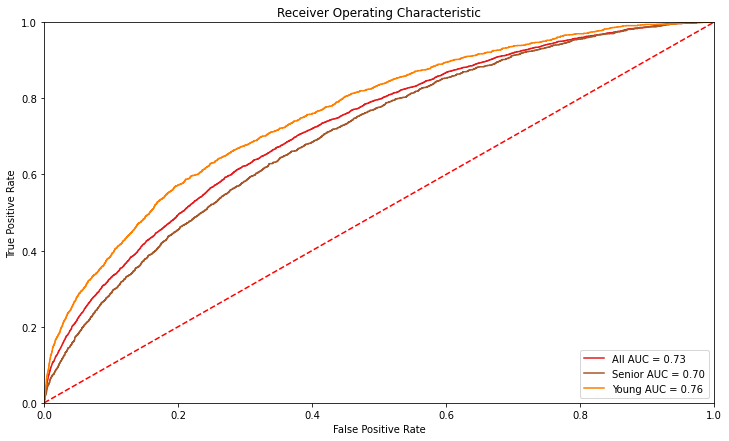

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.title('Receiver Operating Characteristic')

fpr, tpr, roc_auc, thresholds  = get_auc_data(test_label_df['COVID_label'], test_label_df['pred'])
plt.plot(fpr, tpr, label = 'All AUC = %0.2f' % roc_auc, color='#E41A1C')

fpr, tpr, roc_auc, _  = get_auc_data(senior_df['COVID_label'], senior_df['pred'])
plt.plot(fpr, tpr, label = 'Senior AUC = %0.2f' % roc_auc, color='#A65628')

fpr, tpr, roc_auc, _  = get_auc_data(young_df['COVID_label'], young_df['pred'])
plt.plot(fpr, tpr, label = 'Young AUC = %0.2f' % roc_auc, color='#FF7F00')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('test_AUC_plot.png')

Total_cost = P(+) C(-|+) + P(-) C(+|-) 

PC(+) = P(+) * C(-|+)/total_cost

Normalized Expected Cost(NEC)  = FNR_{A,i} * C(−|+)_{A} * PC(+)_{A} + FPR_{A,i} * C(+|−)_{A} *PC(-)_{A} 

100%|██████████████████████████████████████▉| 6751/6754 [15:13<00:00,  7.39it/s]


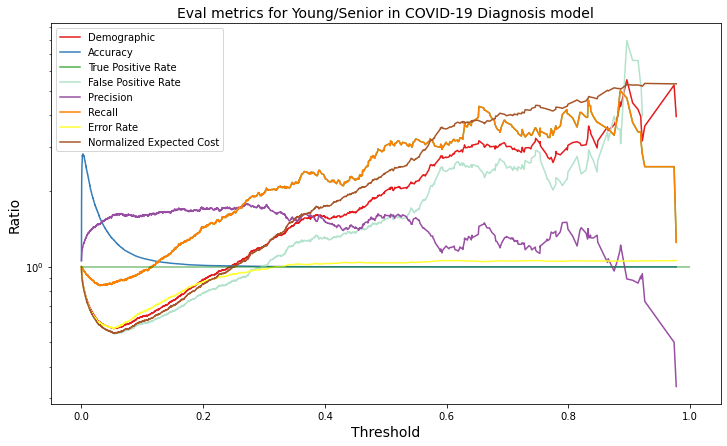

In [5]:
# COVID-19
group_1, group_2 = generate_groups_result(young_df, senior_df, thresholds,
                                          1, 10,
                                          1, 50)
draw_fairness_ratio(group_1, group_2, fig_name='draw_fairness_ratio.png')

100%|██████████████████████████████████████▉| 6751/6754 [08:00<00:00, 14.06it/s]


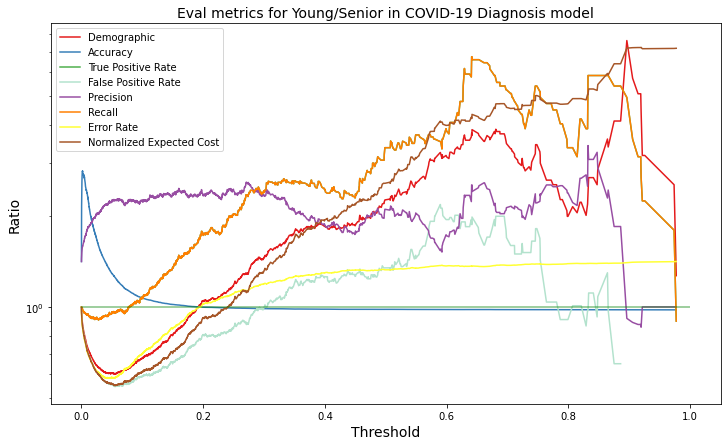

In [6]:
# Initial COVID-19

temp_label_df = test_label_df[test_label_df['dateAcquired'] >= '2021-04-20']
young_df = temp_label_df[temp_label_df['AGE'] < 65]
senior_df = temp_label_df[temp_label_df['AGE'] >= 65]

group_1, group_2 = generate_groups_result(young_df, senior_df, thresholds,
                                          1, 10,
                                          1, 50)
draw_fairness_ratio(group_1, group_2, fig_name='draw_inital_fairness_ratio.png')

100%|██████████████████████████████████████▉| 6751/6754 [10:48<00:00, 10.41it/s]


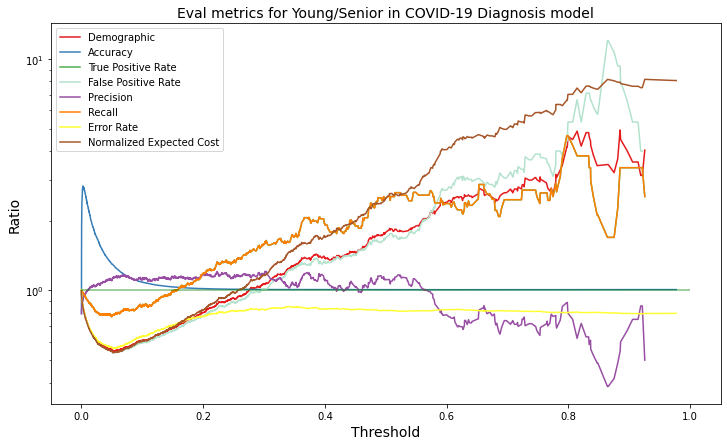

In [7]:
# Delta COVID-19

temp_label_df = test_label_df[test_label_df['dateAcquired'] < '2021-04-20']
young_df = temp_label_df[temp_label_df['AGE'] < 65]
senior_df = temp_label_df[temp_label_df['AGE'] >= 65]

group_1, group_2 = generate_groups_result(young_df, senior_df, thresholds,
                                          5, 50,
                                          1, 100)
draw_fairness_ratio(group_1, group_2, fig_name='draw_delta_fairness_ratio.png')